In [49]:
import pandas as pd
import numpy as np

def standardize(df):
    return (df - df.mean()) / df.std()

def reverse(val, mean, std):
    return (val * std) + mean

# Load the dataset
dataset = pd.read_csv("AAPL_data.csv")
df = dataset[['open', 'volume', 'close']]
df = standardize(df)

# Prepare feature matrix X and target vector y
X = df[['open', 'volume']].to_numpy()
y = df['close'].to_numpy()

# Define train ratio
total_examples = len(X)
train_ratio = 0.8
train_examples = int(total_examples * train_ratio)

# Split into train and test sets
X_train, X_test = X[:train_examples], X[train_examples:]
y_train, y_test = y[:train_examples], y[train_examples:]
df

,open,volume,close
0,-1.511163,1.039602,-1.513842
1,-1.502255,0.067790,-1.504769
2,-1.492073,-0.679694,-1.491991
3,-1.479983,-0.911063,-1.498380
4,-1.486983,-0.695865,-1.528920
...,...,...,...
643,-1.885962,0.271193,-1.874449
644,-1.860509,0.135461,-1.826402
645,-1.812784,-0.022162,-1.921091
646,-1.907598,0.319618,-1.990094


Epoch 1/50


/Users/david/Downloads/machinelearning/finalproject/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0157 - mae: 0.8157 - val_loss: 0.0322 - val_mae: 0.1519
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2297 - mae: 0.3119 - val_loss: 0.0179 - val_mae: 0.0991
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0451 - mae: 0.1625 - val_loss: 0.0259 - val_mae: 0.1253
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208 - mae: 0.1124 - val_loss: 0.0208 - val_mae: 0.1052
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mae: 0.0846 - val_loss: 0.0137 - val_mae: 0.0846
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mae: 0.0804 - val_loss: 0.0103 - val_mae: 0.0749
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - mae: 0.0704 - val_loss: 0.0098 - val_mae: 0.0718
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - mae: 0.0661 - val_loss: 0.0092 - val_mae: 0.0693
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mae: 0.0645 - va

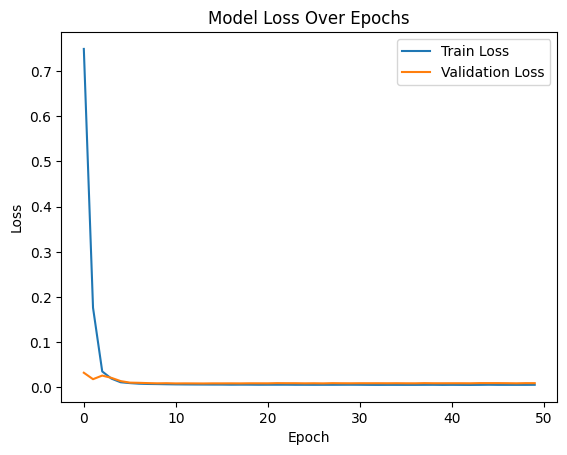

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network architecture
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),  # Input layer with 2 inputs (open, volume) and a hidden layer with 64 neurons
    Dense(64, activation='relu'),               # Another hidden layer with 64 neurons
    Dense(1, activation='linear')               # Output layer with 1 output neuron (prediction of 'close' price)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Figure size 640x480 with 0 Axes>

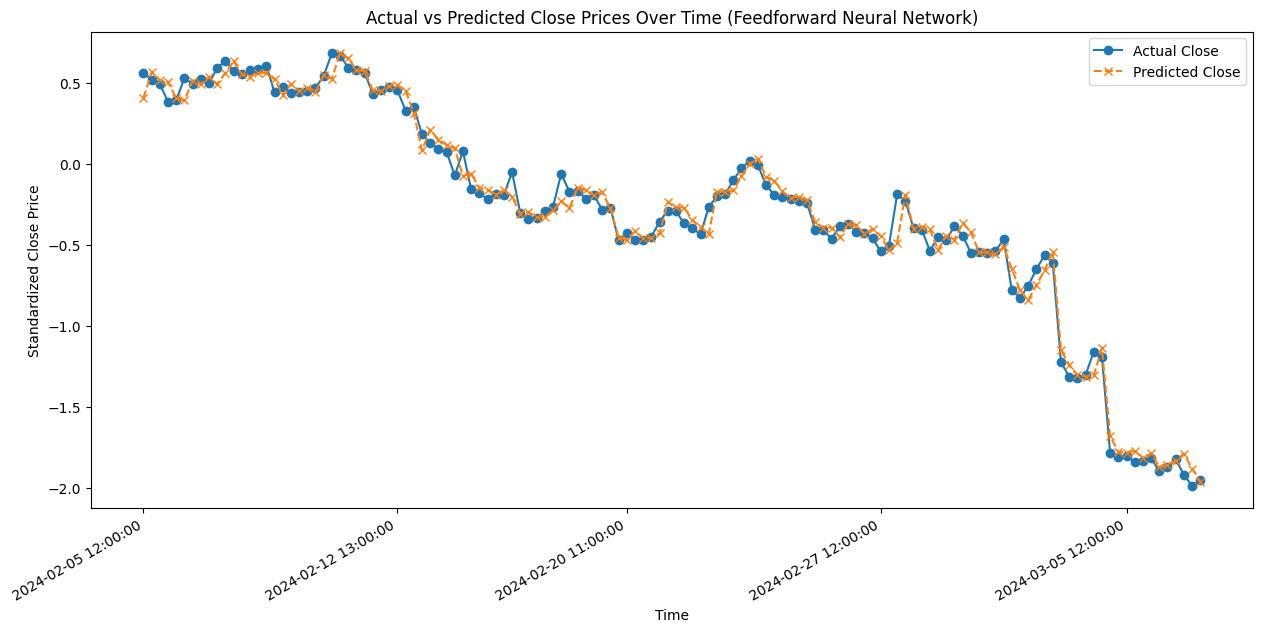

In [51]:
import matplotlib.dates as mdates

y_pred = model.predict(X_test)

# Assuming 'dataset' is your original DataFrame and still contains the 'time' column with datetime type
# Extract the time values for the test set
test_times = dataset['time'].iloc[train_examples:].reset_index(drop=True)
plt.clf()
plt.figure(figsize=(15, 7))  

plt.plot(test_times, y_test, label='Actual Close', marker='o')
plt.plot(test_times, y_pred.flatten(), label='Predicted Close', linestyle='--', marker='x')  # Flatten y_pred if it's 2D

# Format the x-axis to show dates nicely
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=7))  # Adjust to show more or fewer dates

# Improve the x-axis label appearance
plt.gcf().autofmt_xdate()  # Auto format the date labels
plt.xlabel('Time')
plt.ylabel('Standardized Close Price')
plt.title('Actual vs Predicted Close Prices Over Time (Feedforward Neural Network)')
plt.legend()
plt.show()

# RNN

Epoch 1/100


/Users/david/Downloads/machinelearning/finalproject/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 1.3451 - mae: 0.9797 
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2063 - mae: 0.3566
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0160 - mae: 0.0906
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.0079 - mae: 0.0655
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0072 - mae: 0.0640
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.0070 - mae: 0.0624
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0065 - mae: 0.0616
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.0058 - mae: 0.0578
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.0065 - mae: 0.0601
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.0076 - mae: 0.0637
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0090 - mae: 0.0693
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0073 - mae: 0.0628
Epoch 13/100
52/52 ━━━━━

<Figure size 640x480 with 0 Axes>

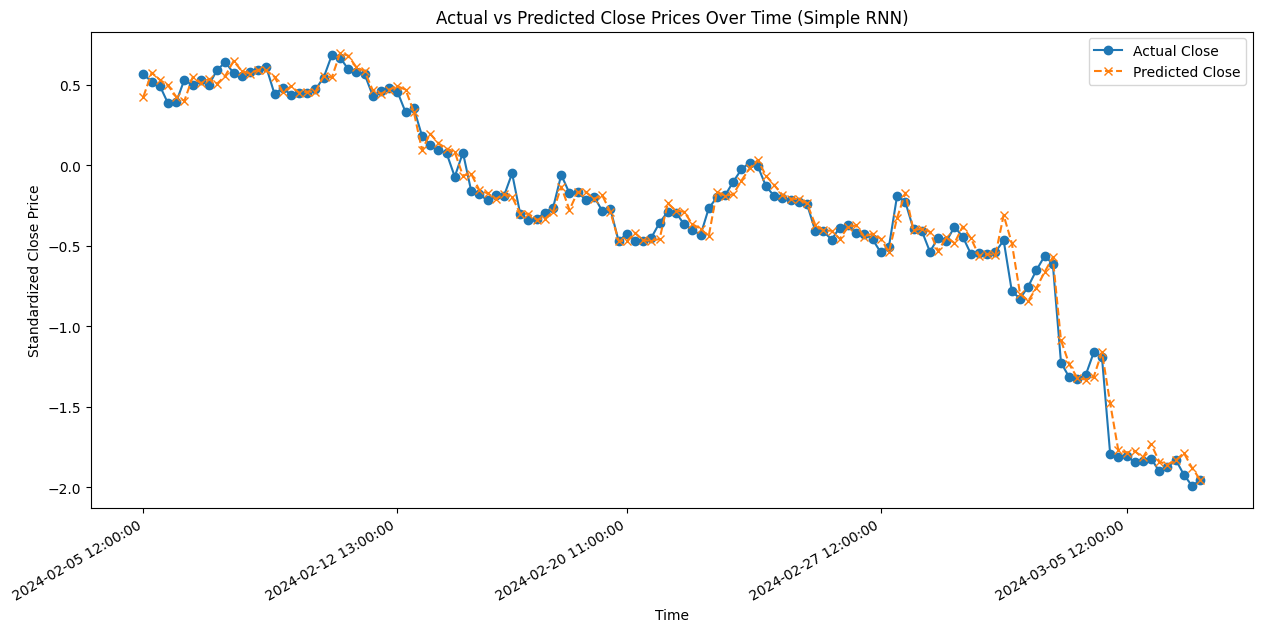

Mean Absolute Error: 0.7309960759607504


In [52]:
from tensorflow.keras.layers import Dense, SimpleRNN

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

y_pred = model.predict(X_test)

plt.clf()
plt.figure(figsize=(15, 7))

plt.plot(test_times, y_test, label='Actual Close', marker='o')
plt.plot(test_times, y_pred, label='Predicted Close', linestyle='--', marker='x')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=7))
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Standardized Close Price')
plt.title('Actual vs Predicted Close Prices Over Time (Simple RNN)')
plt.legend()
plt.show()

# Calculate the mean absolute error
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
